In [72]:
import numpy as np
import glob

# this_run_info = f'0523_0000_take2'
this_run_info = f'0611_0101_take1' # Note: 0611_0101 is essentially the same as 0523_0101_take1 (due to annotation error)
res_dirs = ['./results/twop_eth_agentformer_pre/results_%.1f_%s/epoch_0016/test' % (i, this_run_info) for i in np.arange(0.1,0.91,0.1)]
test_size = 364 # this many txts in each subdir

pre_motion_gt, fut_motion_gt = [], []     # list, len: test_size
fut_motion_preds = [[] for _ in range(len(res_dirs))] # list in list, len: 9 x test_size

In [73]:
import glob 
import os 
import numpy as np

for i,res_dir in enumerate(res_dirs):
    
    gt_dir = res_dir + '/gt/biwi_eth/'
    recon_dir = res_dir + '/recon/biwi_eth/'
    samples_dir = res_dir + '/samples/biwi_eth/'

    gt_pre_files = sorted(glob.glob(gt_dir + 'pre_*.txt'))
    gt_fut_files = sorted(glob.glob(gt_dir + 'frame_*.txt'))
    sample_subdirs = sorted(glob.glob(os.path.join(samples_dir, '*')))

    # print(gt_pre_files[0])
    # print(gt_fut_files[0])
    # print(sample_subdirs[0])

    if i == 0:
        for file in gt_pre_files:
            # Lgt_pre_filesoad the data from the text file into a NumPy array
            data_array = np.loadtxt(file, delimiter=' ')
            pre_motion_gt.append(data_array)
        
        for file in gt_fut_files:
            # Load the data from the text file into a NumPy array
            data_array = np.loadtxt(file, delimiter=' ')
            fut_motion_gt.append(data_array)

    for subdir in sample_subdirs:
        fut_files = [glob.glob(subdir + '/sample_*.txt')[0]]
        for file in fut_files:
            # Load the data from the text file into a NumPy array
            data_array = np.loadtxt(file, delimiter=' ')
            fut_motion_preds[i].append(data_array)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Total agents: 5


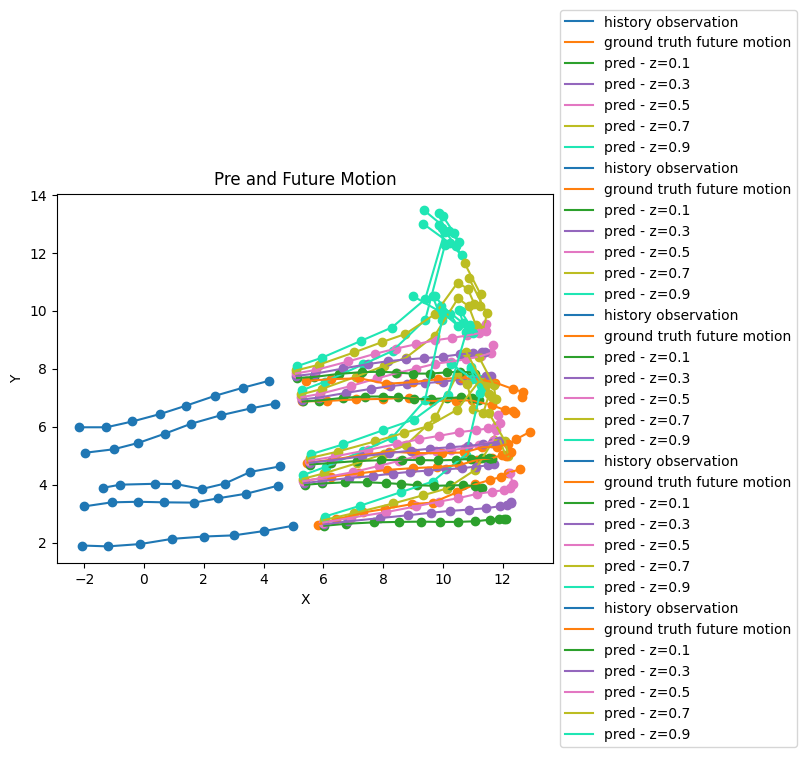

In [74]:
idx = 210

pre_motion_gt_one =  pre_motion_gt[idx][:,2:]
fut_motion_gt_one = fut_motion_gt[idx][:,2:]

# print(fut_motion_preds[0][idx][:,2:])

# fut_motion_preds_one_0 = fut_motion_preds[0][idx][:,2:]

fut_motion_preds_one = [fut_motion_preds[i][idx][:,2:] for i in range(len(res_dirs))]

total_agents = pre_motion_gt_one.shape[0] // 8

print('Total agents:', total_agents)

import matplotlib.pyplot as plt
# Define the color scheme with 11 distinct colors
color_scheme = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),  # blue
    (1.0, 0.4980392156862745, 0.054901960784313725),  # orange
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),  # green
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),  # red
    (0.5803921568627451, 0.403921568627451, 0.7411764705882353),  # purple
    (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),  # brown
    (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),  # pink
    (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),  # gray
    (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),  # yellow
    (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),  # cyan
    (0.12156862745098039, 0.9, 0.7058823529411765)  
]

for j in range(total_agents):
    # Plot pre_motion_gt_one
    plt.scatter(pre_motion_gt_one[j*8:j*8+8, 0], pre_motion_gt_one[j*8:j*8+8, 1], c=color_scheme[0])
    plt.plot(pre_motion_gt_one[j*8:j*8+8, 0], pre_motion_gt_one[j*8:j*8+8, 1], c=color_scheme[0], label='history observation')

    # Plot fut_motion_gt_one
    plt.scatter(fut_motion_gt_one[j*12:j*12+12, 0], fut_motion_gt_one[j*12:j*12+12, 1], c=color_scheme[1])
    plt.plot(fut_motion_gt_one[j*12:j*12+12, 0], fut_motion_gt_one[j*12:j*12+12, 1], c=color_scheme[1], label='ground truth future motion')

    for i in range(len(res_dirs)):
        if i%2 ==0:
            # Plot fut_motion_preds_one
            plt.scatter(fut_motion_preds_one[i][j*12:j*12+12, 0], fut_motion_preds_one[i][j*12:j*12+12, 1], c=color_scheme[i+2])
            plt.plot(fut_motion_preds_one[i][j*12:j*12+12, 0], fut_motion_preds_one[i][j*12:j*12+12, 1], c=color_scheme[i+2], label='pred - z=%.1f' % ((i+1)/10))

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pre and Future Motion')

# Add legend
import matplotlib.pyplot as plt

# Plotting code...

# Create the legend
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the plot layout to make space for the legend
# plt.subplots_adjust(right=0.8)


# Show the plot
plt.show()
